In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how='outer')

# Display the data table for preview
Combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of total mice.
num_of_mice = len(Combined_data["Mouse ID"].unique())
num_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
print(all_duplicate_mouse_id)

      0
0  g989


In [6]:
# Create a clean DataFrame/usable mice by dropping the duplicate mouse by its ID.
usable_mice = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]
usable_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
num_of_mice=len(usable_mice['Mouse ID'].value_counts())
num_of_mice
print("Number_of_Usable_Mice", num_of_mice)

Number_of_Usable_Mice 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_mean = usable_mice.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_mean


drug_median = usable_mice.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_median


drug_variance = usable_mice.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_variance


drug_std = usable_mice.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_std

drug_sem = usable_mice.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
drug_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

alldrugs_stats_table = pd.DataFrame({"Mean": drug_mean, "Median":drug_median, "Variance":drug_variance, "Standard Deviation": drug_std, "SEM": drug_sem})
alldrugs_stats_table

#alldrugs_stats_table.to_csv("fileOne.csv", index=False, header=True)





,Mean,Median,SEM,Standard Deviation,Variance
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
Ketapril,55.235638,53.698743,0.603860,8.279709,68.553577
Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479
Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
Propriva,52.320930,50.446266,0.544332,6.622085,43.852013
Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562


In [10]:
# This method produces everything in a single groupby function
single_group_by = usable_mice.groupby('Drug Regimen')
alldrug_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
alldrug_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

FileNotFoundError: [Errno 2] No such file or directory: '../Images/Pan_mice_per_treat.png'

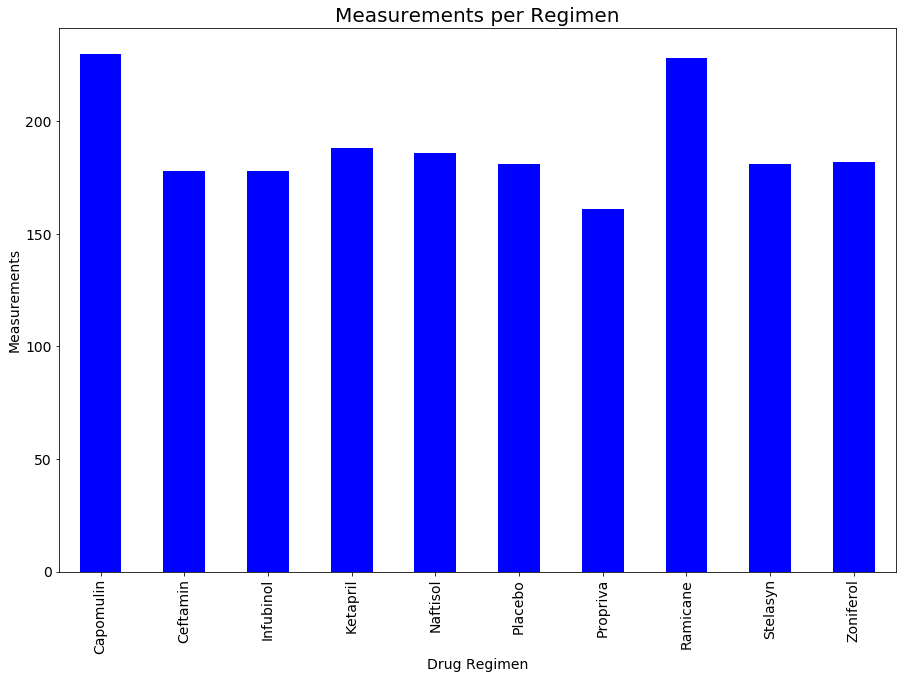

In [11]:
# Generate a bar plot showing the total number of mice for each treatment regimen using pandas Dataframe.plot().
measurements_per_drug = Combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = measurements_per_drug.plot.bar(figsize=(15,10), color='b',fontsize = 14)
measurements_per_drug
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Measurements",fontsize = 14)
plt.title("Measurements per Regimen",fontsize = 20)

plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")
#plt.tight_layout()
plt.show()

measurements_per_drug

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment regimen using using using pyplot.
##plt.style.use('seaborn-dark-palette')

## Set x axis and tick locations
x_axis = np.arange(len(measurements_per_drug))

## Call matplotlib.pyplot to draw histogram
plt.bar(x_axis, measurements_per_drug, color='b', alpha=0.5, align="center")

## Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, measurements_per_drug.index)

## Rotates X-Axis Ticks by 90-degrees
plt.xticks(rotation = 90) 

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(measurements_per_drug)+10)

plt.title("Total No. of Measurements Per Regimen",fontsize = 15)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Total Number of Measurements",fontsize = 10)
plt.legend(['Measurement']) 

plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment regimen using using using pyplot.

tot_measure_per_drug = Combined_data.groupby("Drug Regimen").count()['Mouse ID'].sort_values(ascending=False)
print(tot_measure_per_drug) 

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
tot_measure_per_drug.plot(kind="bar", color="blue", figsize=(7,4), legend=True)

# Set a title, x-label, and y-label for the chart
plt.title("Total No. of Measurements Per Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.legend(['Measurement']);
plt.tight_layout()
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
##plt.style.use('seaborn-dark-palette')

## Set x axis and tick locations
x_axis = np.arange(len(tot_measure_per_drug))

## Call matplotlib.pyplot to draw histogram
plt.bar(x_axis, tot_measure_per_drug, color='b', alpha=0.5, align="center")

## Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, tot_measure_per_drug.index)

## Rotates X-Axis Ticks by 90-degrees
plt.xticks(rotation = 90) 

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(tot_measure_per_drug)+10)

plt.title("Total No. of Measurements Per Drug Regimen",fontsize = 15)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Total Number of Measurements",fontsize = 10)
plt.legend(['Measurement']) 

plt.tight_layout()
plt.show()

NameError: name 'tot_measure_per_drug' is not defined

In [198]:
## Group by gender and get the counts for plotting
groupby_male_female = Combined_data.groupby(["Mouse ID","Sex"])
##print(groupby_male_female.size())
male_fem_mea_cnt_df = pd.DataFrame(groupby_male_female.size())

In [199]:
# Create the dataframe with total count of Female and Male mice' measurement
mea_cnt_by_gender = pd.DataFrame(male_fem_mea_cnt_df.groupby(["Sex"]).sum())
mea_cnt_by_gender.columns = ["Total Count"]
print(mea_cnt_by_gender["Total Count"])

Sex
Female    935
Male      958
Name: Total Count, dtype: int64


In [200]:
# create and format the percentage of female vs male
tot_measurements = mea_cnt_by_gender["Total Count"].sum()
mea_cnt_by_gender["Percentage of Sex"] = 100*(mea_cnt_by_gender["Total Count"] / tot_measurements)

# format the "Percentage of Sex" column
mea_cnt_by_gender["Percentage of Sex"] = round(mea_cnt_by_gender["Percentage of Sex"], 3)
print(mea_cnt_by_gender)

        Total Count  Percentage of Sex
Sex                                   
Female          935             49.392
Male            958             50.608


In [201]:
# Labels for the sections of our pie chart
## labels = ["Female", "Male"]

# The colors of each section of the pie chart
colors = ["lightcoral", "green"]
explode = (0, 0)

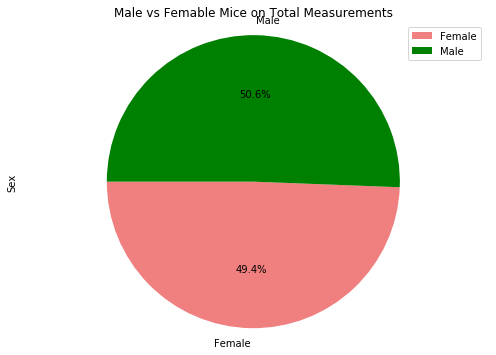

In [202]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
mea_cnt_by_gender.plot(kind='pie', y='Percentage of Sex', explode = explode, figsize=(7, 5), autopct="%1.1f%%", colors=colors, startangle=180, legend=True)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Set a title, x-label, and y-label for the chart
plt.title("Male vs Femable Mice on Total Measurements")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [203]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volume    
    # add subset     
    # Determine outliers using upper and lower bounds
# Capomulin, Ramicane, Infubinol, and Ceftamin

## Create one dataframe for each of the 4 regimens
Capomulin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin", :]

## Process each drug related data in the following sections

In [204]:
print(Capomulin_df)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
15       s185    Capomulin  Female           3          17         25   
16       s185    Capomulin  Female           3          17         30   
17       s185    Capomulin  Female           3          17         35   
18       s185    Capomulin  Female           3          17         40   
19       s185    Capomulin  Female           3          17         45   
20       x401    Capomulin  Female          16          15          0   
21       x401    Capomulin  Female          16          15          5   
22       x401    Capomulin  Female          16     

In [205]:
## Drug 1: Capomulin
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last_timept_ser = Capomulin_df.groupby(['Mouse ID'])['Timepoint'].max()
Capomulin_last_timept_ser = Capomulin_last_timept_ser.reset_index()
Capomulin_last_timept_ser.head(3)
##type(Capomulin_last_timept_ser)

,Mouse ID,Timepoint
0,b128,45
1,b742,45
2,f966,20


In [206]:
## Create a df with Mouse ID and last Timepoints series
Capomulin_mouseId_last_timept_df = pd.DataFrame(Capomulin_last_timept_ser)

##Capomulin_mouseId_last_timept_df.reset_index() 
#Capomulin_mouseId_last_timept_df.info()
#Capomulin_mouseId_last_timept_df['Mouse ID']
# Capomulin_mouseId_last_timept_df.head(3)

In [207]:
Capomulin_mouseId_last_timept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Mouse ID     25 non-null object
Timepoint    25 non-null int64
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [208]:
#clean_mouse_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge_df = pd.merge(Capomulin_mouseId_last_timept_df, Combined_data, on=(['Mouse ID','Timepoint']), how='left')

Capomulin_merge_df.head()
len(Capomulin_merge_df['Mouse ID'])

25

In [209]:
# Drug 1 continued: Capomulin: Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
Capomulin_tumor_vols = Capomulin_merge_df["Tumor Volume (mm3)"]

## Since the data is in a dataframe, use pandas to give quartile calculations
quartiles = Capomulin_tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumor volumes: {lowerq}")
print(f"The upper quartile of Capomulin tumor volumes: {upperq}")
print(f"The interquartile range of Capomulin tumor volumes: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumor volumes: 32.37735684
The upper quartile of Capomulin tumor volumes: 40.1592203
The interquartile range of Capomulin tumor volumes: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [210]:
# Drug 1: Continued -  Determine outliers using upper and lower bounds
Capomulin_merge_df.head()
Capomulin_outlier = Capomulin_merge_df.loc[(Capomulin_merge_df['Tumor Volume (mm3)'] < lower_bound) | (Capomulin_merge_df['Tumor Volume (mm3)'] > upper_bound), :]
Capomulin_outlier
#print(f"lower = {lower_bound}, upp = {upper_bound}")

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [211]:
## Drug 2: Ramicane
# Start by getting the last (greatest) timepoint for each mouse
Ramicane_last_timept_ser = Ramicane_df.groupby(['Mouse ID'])['Timepoint'].max()
Ramicane_last_timept_ser = Ramicane_last_timept_ser.reset_index()
Ramicane_last_timept_ser.head(3)
## Create a df with Mouse ID and last Timepoints series
Ramicane_mouseId_last_timept_df = pd.DataFrame(Ramicane_last_timept_ser)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_merge_df = pd.merge(Ramicane_mouseId_last_timept_df, Combined_data, on=("Mouse ID","Timepoint"), how="left")
## Ramicane_merge_df.head()
## len(Ramicane_merge_df['Mouse ID']) == 25

In [212]:
Ramicane_last_timept_ser.head(3)

,Mouse ID,Timepoint
0,a411,45
1,a444,45
2,a520,45


In [213]:
# Drug 2 continued: Capomulin: Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
Ramicane_tumor_vols = Ramicane_merge_df["Tumor Volume (mm3)"]

## Since the data is in a dataframe, use pandas to give quartile calculations
quartiles = Ramicane_tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumor volumes: {lowerq}")
print(f"The upper quartile of Ramicane tumor volumes: {upperq}")
print(f"The interquartile range of Ramicane tumor volumes: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor volumes: 31.56046955
The upper quartile of Ramicane tumor volumes: 40.65900627
The interquartile range of Ramicane tumor volumes: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [214]:
# Drug 2 Ramicane: Continued -  Determine outliers using upper and lower bounds
Ramicane_outlier = Capomulin_merge_df.loc[(Capomulin_merge_df['Tumor Volume (mm3)'] < lower_bound) | (Capomulin_merge_df['Tumor Volume (mm3)'] > upper_bound), :]
Ramicane_outlier
#print(f"lower = {lower_bound}, upp = {upper_bound}")

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [215]:
## Drug 3: Infubinol
# Start by getting the last (greatest) timepoint for each mouse

Infubinol_last_timept_ser = Infubinol_df.groupby('Mouse ID')['Timepoint'].max()
Infubinol_last_timept_ser = Infubinol_last_timept_ser.reset_index()
Infubinol_last_timept_ser.head(3)
## Create a df with Mouse ID and last Timepoints series
Infubinol_mouseId_last_timept_df = pd.DataFrame(Infubinol_last_timept_ser)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_merge_df = pd.merge(Infubinol_mouseId_last_timept_df, Combined_data, on=("Mouse ID","Timepoint"), how="left")
## Infubinol_merge_df.head()
## len(Infubinol_merge_df['Mouse ID']) == 25

In [216]:
# Drug 3 continued: Infubinol: Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
Infubinol_tumor_vols = Infubinol_merge_df["Tumor Volume (mm3)"]

## Since the data is in a dataframe, use pandas to give quartile calculations
quartiles = Infubinol_tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumor volumes: {lowerq}")
print(f"The upper quartile of Infubinol tumor volumes: {upperq}")
print(f"The interquartile range of Infubinol tumor volumes: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumor volumes: 54.04860769
The upper quartile of Infubinol tumor volumes: 65.52574285
The interquartile range of Infubinol tumor volumes: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [217]:
# Drug 3 Infubinol: Continued -  Determine outliers using upper and lower bounds
Infubinol_outlier = Infubinol_merge_df.loc[(Infubinol_merge_df['Tumor Volume (mm3)'] < lower_bound) | (Infubinol_merge_df['Tumor Volume (mm3)'] > upper_bound), :]
Infubinol_outlier
##print(f"lower = {lower_bound}, upp = {upper_bound}")

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
5,c326,5,Infubinol,Female,18,25,36.321346,0


In [218]:
## Drug 4: Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_last_timept_ser = Ceftamin_df.groupby('Mouse ID')['Timepoint'].max()
Ceftamin_last_timept_ser = Ceftamin_last_timept_ser.reset_index()
Ceftamin_last_timept_ser.head(3)
## Create a df with Mouse ID and last Timepoints series
Ceftamin_mouseId_last_timept_df = pd.DataFrame(Ceftamin_last_timept_ser)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_merge_df = pd.merge(Ceftamin_mouseId_last_timept_df, Combined_data, on=("Mouse ID","Timepoint"), how="left")
# Ceftamin_merge_df.head()
# len(Ceftamin_merge_df['Mouse ID']) == 25

In [219]:
# Drug 4 continued: Ceftamin: Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
Ceftamin_tumor_vols = Ceftamin_merge_df["Tumor Volume (mm3)"]

## Since the data is in a dataframe, use pandas to give quartile calculations
quartiles = Ceftamin_tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumor volumes: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volumes: {upperq}")
print(f"The interquartile range of Ceftamin tumor volumes: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumor volumes: 48.72207785
The upper quartile of Ceftamin tumor volumes: 64.29983003
The interquartile range of Ceftamin tumor volumes: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [220]:
# Drug 4 Ceftamin: Continued -  Determine outliers using upper and lower bounds
Ceftamin_outlier = Ceftamin_merge_df.loc[(Ceftamin_merge_df['Tumor Volume (mm3)'] < lower_bound) | (Ceftamin_merge_df['Tumor Volume (mm3)'] > upper_bound), :]
Ceftamin_outlier
##print(f"lower = {lower_bound}, upp = {upper_bound}")

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [221]:
## Print out a report for outliers in 4 regimens: 
print(f"Capomulin's potential outliers: {Capomulin_outlier['Tumor Volume (mm3)']}")
print(f"Ramicane's potential outliers: {Ramicane_outlier['Tumor Volume (mm3)']}")
print(f"Infubinol's potential outliers: {Infubinol_outlier['Tumor Volume (mm3)']}")
print(f"Ceftamin's potential outliers: {Ceftamin_outlier['Tumor Volume (mm3)']}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


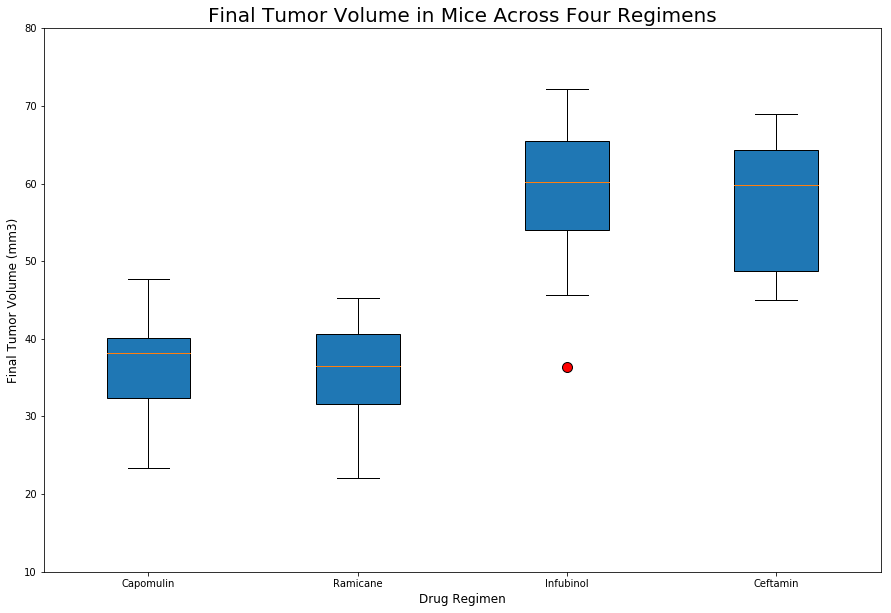

In [222]:
# Put treatments into a list for for loop (and later for plot labels)
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
treatment_data_to_plot = [Capomulin_tumor_vols, Ramicane_tumor_vols, Infubinol_tumor_vols, Ceftamin_tumor_vols]

fig1, ax1 = plt.subplots(figsize=(15, 10))

ax1.set_title('Final Tumor Volume in Mice Across Four Regimens',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(treatment_data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True, flierprops=dict(markerfacecolor = "red",markersize= 10))

plt.ylim(10, 80)

plt.show()
plt.tight_layout()

In [223]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    
    # add subset 
   
    
    # Determine outliers using upper and lower bounds
 

In [224]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

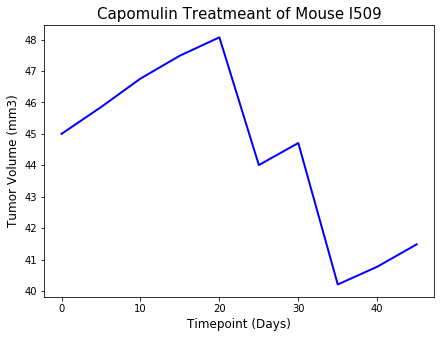

In [225]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse_l509_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
Capomulin_mouse_l509_df.head(3)

x_axis = Capomulin_mouse_l509_df["Timepoint"]
tumor_vol = Capomulin_mouse_l509_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(7, 5))
plt.title('Capomulin Treatmeant of Mouse l509',fontsize =15)
plt.plot(x_axis, tumor_vol,linewidth=2, markersize=0, marker="o",color="blue")
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)

## Note: Comment out the plt.show() will remove the "Figure size description"
plt.show()
plt.tight_layout()



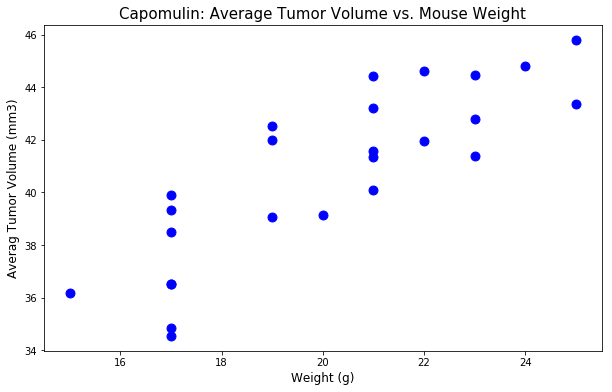

In [226]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_avg_tumor_vol = Capomulin_df.groupby(['Mouse ID']).mean()
Capomulin_avg_tumor_vol.head(3)

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(Capomulin_avg_tumor_vol['Weight (g)'], Capomulin_avg_tumor_vol['Tumor Volume (mm3)'], s=80, color="blue")

plt.title('Capomulin: Average Tumor Volume vs. Mouse Weight',fontsize =15)
plt.xlabel('Weight (g)',fontsize=12)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize=12)

plt.show()
plt.tight_layout()

## Correlation and Regression

In [227]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_vol_corr = round(st.pearsonr(Capomulin_avg_tumor_vol['Weight (g)'], Capomulin_avg_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {weight_vol_corr}")

The correlation between mouse weight and the average tumor volume is 0.84


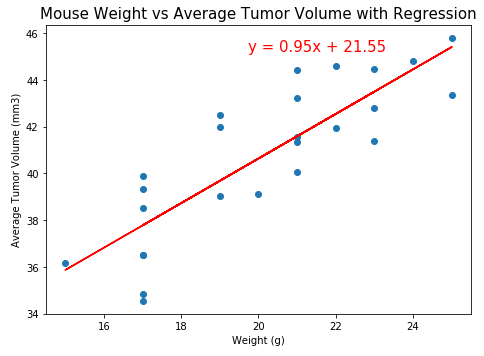

In [228]:
 # Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(7, 5))

x_values = Capomulin_avg_tumor_vol['Weight (g)']
y_values = Capomulin_avg_tumor_vol['Tumor Volume (mm3)']

## Calculate the line y = kx + b
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## Plot the scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

## print the regression line
plt.annotate(line_eq, (6,10), fontsize=15, color="red")

## print the equation on the plot
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")

plt.title('Mouse Weight vs Average Tumor Volume with Regression',fontsize =15)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout();
plt.show()


# print(f"The r-squared value is: {rvalue**2}")